In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import mne

Random with sampling rate =100 and a baseline time of 500ms

In [28]:
signal = np.random.uniform(0.0, 2.0, 2500*50)

# Split to trials
trials = np.array(np.array_split(signal, 50)) # (50, 40/20)

Real signal (P300 from MNE)

In [3]:
# df = pd.read_csv("p300-6trials-12rep-chaky.csv")

df = pd.read_csv("data_2017-02-04-16_03_08.csv")


from datetime import datetime

timestamp = 1545730073
timestampsArr = df["timestamps"].apply(datetime.fromtimestamp)
# 4 ms each step

df = df.drop(["timestamps"], axis=1)

#channels named according to how EEG is plugged
# channels = ['timestamps', 'P4', 'Pz', 'P3', 'PO4', 'POz', 'PO3', 'O2', 'O1', 'Marker']   
# df.columns = channels

channels = ["TP9","AF7","AF8","TP10","Right" "AUX","Marker"]
df.columns = channels

# Marker
# 0: nothing happens
# 1: flash on non-target
# 2: flash on target

In [4]:
df.head()

,TP9,AF7,AF8,TP10,RightAUX,Marker
0,119.629,23.438,23.926,80.078,77.148,0
1,54.199,27.344,28.320,73.730,96.680,0
2,-31.738,27.832,34.180,59.082,73.730,0
3,-14.160,33.691,37.109,58.594,39.062,0
4,91.797,33.203,29.785,65.430,-17.578,0


In [5]:
info = mne.create_info(ch_names = channels, sfreq = 100)
mneObj = mne.io.RawArray(df.transpose(), info)

Creating RawArray with float64 data, n_channels=6, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   307.310 secs
Ready.


Using matplotlib as 2D backend.


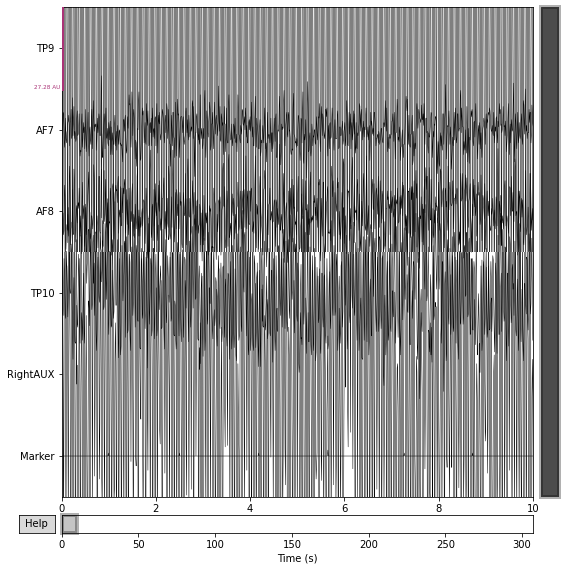

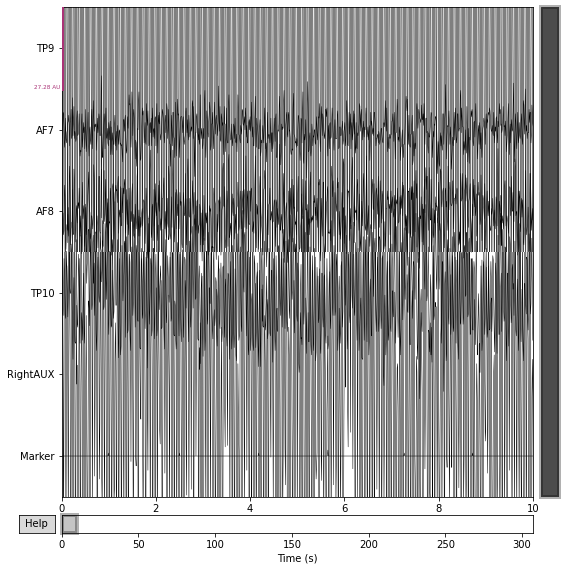

In [6]:
mneObj.plot()

In [154]:
def DFT(signal, fs):
    # reconstructing the waves using rotating vectors exploiting discrete signals harmonics feature
    N = len(signal)
    nyquist = fs/2
    coeff = []
    freq = np.array(list(range(0, N-1)))
    sine_t = np.linspace(0, N-1, N)/N

    # Generating different signals anf integrating 
    for i in range(N-1):
        sine_wave = np.exp(-2*np.pi*(1j)*freq[i]*sine_t)
        coeff.append(sine_wave@np.transpose(signal))  # integration
    
    reconstructed_signals = np.zeros((1, N), dtype = 'complex')
    coeff = np.array(coeff)
    coeff = coeff/ N

    # ptsHz = np.linspace(0,nyquist,(N/2)+1); 
    amp  = np.sqrt(coeff.real**2 + coeff.imag**2)*2
   
    return np.array(freq[:len(freq)//2]) , np.array(amp[:len(amp)//2])

In [290]:
def spectrogram(spec, trials, fs):
    plt.figure(figsize=(20,8))
    plt_spec = plt.imshow(spec,origin='lower')

    ks = np.linspace(0,spec.shape[0], 10)
    freq_Hz = ks*fs/len(trials[0])
    ksHz = [int(i) for i in freq_Hz] 
    plt.yticks(ks,ksHz)
    plt.ylabel("Frequency (Hz)")

    ts_spec = np.linspace(0,spec.shape[1],10)
    ts_spec_sec  = ["{:4.2f}".format(i) for i in np.linspace(0,2*trials[0]/2,10)]
    plt.xticks(ts_spec,ts_spec_sec)
    plt.xlabel("Time (sec)")

    plt.colorbar(None,use_gridspec=True)
    plt.show()


Time Frequency Analysis

In [289]:
def STFT(trials, windowSize = 100, overlapping = 50):
    new_trial = [[]]
    freq_spec = np.array([])
    for trial in trials:
            temp = [DFT(trial[i : i + windowSize], 100)[0] for i in range(0, len(trial), overlapping)]
            temp = np.transpose(temp)
            # freq_spec = np.insert(freq_spec, 0, temp)

    freq_spec = np.array(freq_spec)
    print(freq_spec.shape)
    return freq_spec
# print(len(temp[:int(0.2*len(temp))]))       
# baseline_mean = np.mean(temp[:int(0.2*len(temp))])
#         print(baseline_mean)
#         new_trial.append(temp) 
# t1 --> freq1
# t2 --> freq2

In [ ]:
def percentage_change(signal):
    

In [271]:
res = STFT(trials)

d:\Users\miret\anaconda3\envs\bci\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)


KeyboardInterrupt: 

In [217]:
res

array([[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
               17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
               34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])       ],
       [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
               17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
               34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])       ],
       [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
               17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
               34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])       ],
       ...,
       [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
               17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
               34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47

In [ ]:
def pltTF():

    # fig, ax = plt.subplots(2, figsize=(8, 7))
    # f, t, Sxx = signal.spectrogram(x, fs)
    # ax[0].pcolormesh(t, f, Sxx)
    # ax[0].set_ylabel('Frequency [Hz]')
    # ax[0].set_xlabel('Time [sec]')
    # # Note, if using output that is not one sided, then use the following:
    # f, t, Sxx = signal.spectrogram(x, fs, return_onesided=False)
    # ax[1].pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0))
    # ax[1].set_ylabel('Frequency [Hz]')
    # ax[1].set_xlabel('Time [sec]')
    # plt.show()

Inter Trial Phase Consistency

In [ ]:
def ITPC():
    